<a href="https://colab.research.google.com/github/jeraldflowers/Deep-Learn-PyTorch/blob/main/Crear_Una_Red_Neuronal_en_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #  Capas sin parametros

In [ ]:
class Net(nn.Module):
  def __init__(self,num_channels):
    super(Net,self).__init__()

    self.num_channels = num_channels

    self.conv1 = nn.Conv2d(3,self.num_channels, 3, stride = 1, padding = 1)
    self.conv2 = nn.Conv2d(self.num_channels, self.num_channels*2, 3, stride = 1, padding = 1)
    self.conv3 = nn.Conv2d(self.num_channels*2, self.num_channels*4, 3, stride = 1, padding = 1)

    self.fc1 = nn.Linear(self.num_channels*4*8*8, self.num_channels*4)
    self.fc2 = nn.Linear(self.num_channels*4, 6)

    def forward(self, x):
      # Empieza 3x64x64
      x = self.conv1(x) # num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x, 2)) # num_channels x 32 x 32
      x = self.conv2(x) # num_channels*2 x 32 x 32
      x = F.relu(F.max_pool2d(x, 2)) # num_channels*2 x 16 x 16
      x = self.conv3(x) # num_channels*4 x 16 x 16
      x = F.relu(F.max_pool2d(x, 2)) # num_channels*4 x 8 x 8

      # flatten
      x = x.view(-2, self.num_channels*4*8*8)

      # fc
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      # log_softmax
      x = F.log_softmax(x, dim=1)

      return x

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls '/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS'

test_signs  train_signs  val_signs


In [4]:
import sys
sys.path.append('/gdrive/My Drive/dl-pytorch')

In [6]:
from plot_helpers import imshow

In [26]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class SIGNSDataset(Dataset):
  def __init__(self, base_dir, split="train", transform=None):
    path = os.path.join(base_dir, "{}_signs".format(split))
    files = os.listdir(path)

    self.filenames = [os.path.join(path, f) for f in files if f.endswith(".jpg")]

    self.targets = [int(f[0]) for f in files]
    self.transform = transform

  def __len__(self):
    return len(self.filenames)

  def __getitem__(self, idx):
    image = Image.open(self.filenames[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]


In [27]:
signs = SIGNSDataset('/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS', split="train")

In [28]:
len(signs)

864

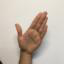

In [29]:
signs[0][0]